In [3]:
import pandas as pd
import numpy as np
import xgboost as xgb
from sklearn.metrics import roc_auc_score
from xgboost import XGBClassifier
from sklearn.model_selection import KFold
from scipy.interpolate import lagrange
import matplotlib.pyplot as plt
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.linear_model import LogisticRegressionCV,LinearRegression
from sklearn.linear_model.logistic import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn import metrics
from sklearn.preprocessing import OneHotEncoder
from collections import Counter
import pandas as pd
import numpy as np
import xgboost as xgb
from sklearn.metrics import roc_auc_score
from xgboost import XGBClassifier
from sklearn.model_selection import KFold
from scipy.interpolate import lagrange
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegressionCV,LinearRegression
from sklearn.linear_model.logistic import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.metrics import roc_curve
import lightgbm as lgb
from sklearn.pipeline import make_pipeline
from sklearn import metrics
from collections import Counter
import warnings
warnings.filterwarnings(module='sklearn*', action='ignore', category=DeprecationWarning)
from catboost import CatBoostClassifier
import random
from sklearn.neighbors import NearestNeighbors

In [95]:
place = '4.txt'
train = pd.read_csv(place, sep='\t')
print(train.shape)

(15354, 41)


In [96]:
train = train.dropna(axis=0)
print(train.shape)

(15338, 41)


In [97]:
train.index = list(range(15338))

In [98]:
y = train['fld']
train = train.drop(['fld','ms','bmir','age','性别','mscount','收缩压','平均红细胞血红蛋白含量','总胆固醇',
                    '平均红细胞血红蛋白浓度','尿素氮','身高','红细胞压积','臀围','红细胞体积分布宽度','中性粒细胞百分比',
                   '血小板压积','高低蛋白比','血红蛋白','淋巴细胞百分比','舒张压'],axis=1)
print(np.sum(y==0))
print(np.sum(y==1))

13455
1883


In [99]:
train.shape

(15338, 20)

In [100]:
X = np.array(train)
y = np.array(y)

In [105]:
skf = StratifiedKFold(n_splits=10,random_state=0,shuffle=True)
clf = LogisticRegression(class_weight={1:7.5,0:1})
score1 = []
score2 = []
Sensitivity = []
Specificity = []
auc = []
for train, test in skf.split(X,y):
    X_train,X_test=X[train],X[test]
    y_train,y_test=y[train],y[test]
    clf.fit(X_train, y_train)
    
    y_pred1 = clf.predict(X_train)
    accuracy1 = np.mean(y_train==y_pred1)
    score1.append(accuracy1)
    
    y_pred2 = clf.predict(X_test)
    accuracy2 = np.mean(y_test==y_pred2)
    score2.append(accuracy2)
    confusion = metrics.confusion_matrix(y_test, y_pred2)
    auc_ = metrics.roc_auc_score(y_test, y_pred2)
    TP = confusion[1, 1]
    TN = confusion[0, 0]
    FP = confusion[0, 1]
    FN = confusion[1, 0]
    TPR = TP/(TP+FN)
    TNR = TN/(TN+FP)
    Sensitivity.append(TPR)
    Specificity.append(TNR)
    auc.append(auc_)
score1 = np.array(score1)
score2 = np.array(score2)
Sensitivity = np.array(Sensitivity)
Specificity = np.array(Specificity)
auc = np.array(auc)
print('The accuracy on trainging set is:',np.mean(score1),'The accuracy on test set is:', np.mean(score2))
print('The Sensitivity is:', np.mean(Sensitivity), 'The Specificity is', np.mean(Specificity))
print('auc is:', np.mean(auc))

D:\anaconda\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
D:\anaconda\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
D:\anaconda\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
D:\anaconda\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
D:\anaconda\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
D:\anaconda\lib\site-packages\sklea

The accuracy on trainging set is: 0.7664695773369402 The accuracy on test set is: 0.7661332758621546
The Sensitivity is: 0.8141084093211752 The Specificity is 0.7594194004540509
auc is: 0.7867639048876129


In [107]:
skf = StratifiedKFold(n_splits=10,random_state=0,shuffle=True)
clf = lgb.LGBMClassifier(class_weight={1:8,0:1},categorical_features=[0],
                        colsample_bytree=0.8,num_leaves=7,reg_alpha=4,reg_lambda=14,
                         min_child_samples=3, importance_type='split')
score1 = []
score2 = []
Sensitivity = []
Specificity = []
auc = []
A = []
for train, test in skf.split(X,y):
    X_train,X_test=X[train],X[test]
    y_train,y_test=y[train],y[test]
    clf.fit(X_train, y_train)
    
    y_pred1 = clf.predict(X_train)
    accuracy1 = np.mean(y_train==y_pred1)
    score1.append(accuracy1)
    
    y_pred2 = clf.predict(X_test)
    accuracy2 = np.mean(y_test==y_pred2)
    score2.append(accuracy2)
    confusion = metrics.confusion_matrix(y_test, y_pred2)
    auc_ = metrics.roc_auc_score(y_test, y_pred2)
    TP = confusion[1, 1]
    TN = confusion[0, 0]
    FP = confusion[0, 1]
    FN = confusion[1, 0]
    TPR = TP/(TP+FN)
    TNR = TN/(TN+FP)
    Sensitivity.append(TPR)
    Specificity.append(TNR)
    auc.append(auc_)
    A.append(clf.booster_.feature_importance())
score1 = np.array(score1)
score2 = np.array(score2)
Sensitivity = np.array(Sensitivity)
Specificity = np.array(Specificity)
auc = np.array(auc)
print('The accuracy on trainging set is:',np.mean(score1),'The accuracy on test set is:', np.mean(score2))
print('The Sensitivity is:', np.mean(Sensitivity), 'The Specificity is', np.mean(Specificity))
print('auc is:', np.mean(auc))

The accuracy on trainging set is: 0.7575664883698315 The accuracy on test set is: 0.7436398169777207
The Sensitivity is: 0.8316306428008555 The Specificity is 0.7313256406149019
auc is: 0.7814781417078788


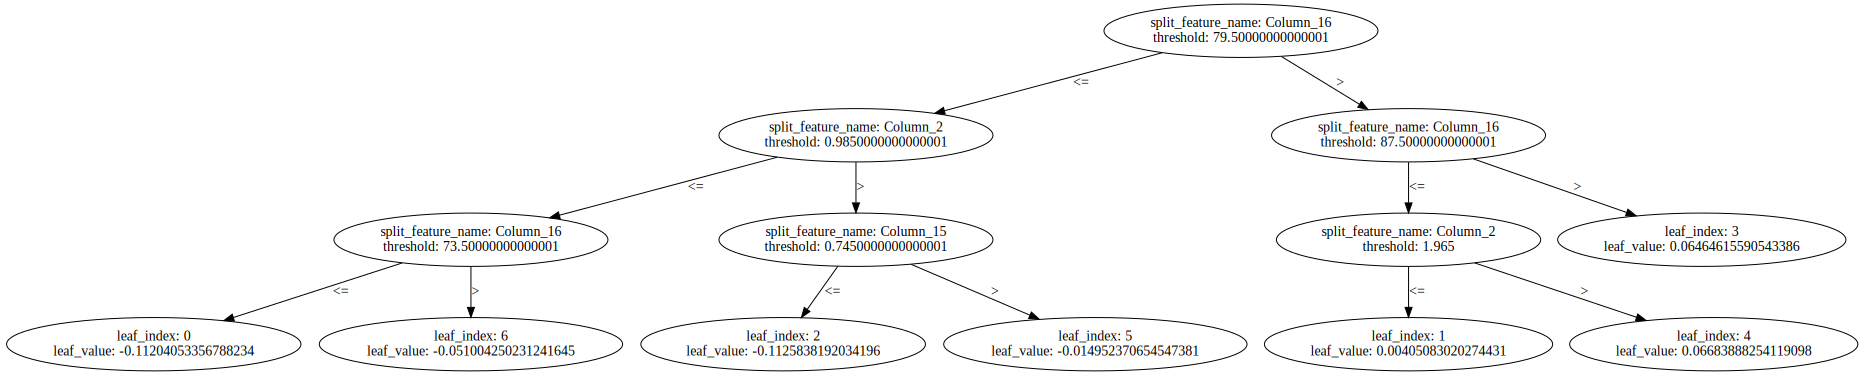

In [108]:
import os
os.environ["PATH"] += os.pathsep + 'C:/Program Files (x86)/Graphviz2.38/bin'
import lightgbm as lgb

lgb.create_tree_digraph(clf, tree_index=10)